In [1]:
!pip install mlxtend


In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


In [3]:
dataset = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread']
]


In [4]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df


,bread,butter,milk
0,True,True,True
1,True,True,False
2,True,False,True
3,True,True,True
4,True,True,False
5,True,False,True


In [5]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
print(frequent_itemsets)


    support         itemsets
0  1.000000          (bread)
1  0.666667         (butter)
2  0.666667           (milk)
3  0.666667  (bread, butter)
4  0.666667    (milk, bread)


In [6]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


  antecedents consequents   support  confidence  lift
0     (bread)    (butter)  0.666667    0.666667   1.0
1    (butter)     (bread)  0.666667    1.000000   1.0
2      (milk)     (bread)  0.666667    1.000000   1.0
3     (bread)      (milk)  0.666667    0.666667   1.0


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


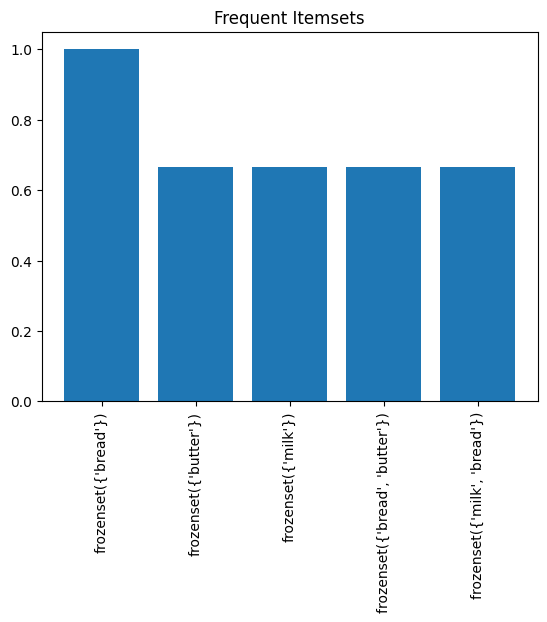

In [7]:
import matplotlib.pyplot as plt

plt.bar(x=frequent_itemsets['itemsets'].astype(str), height=frequent_itemsets['support'])
plt.xticks(rotation=90)
plt.title("Frequent Itemsets")
plt.show()
